In [285]:
import tensorflow as tf
import os

In [286]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [287]:
import cv2
# import imghdr
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [316]:
data = tf.keras.utils.image_dataset_from_directory??


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [289]:
data_iterator = data.as_numpy_iterator()

In [290]:
batch = data_iterator.next()
batch[0].shape
batch[1]

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

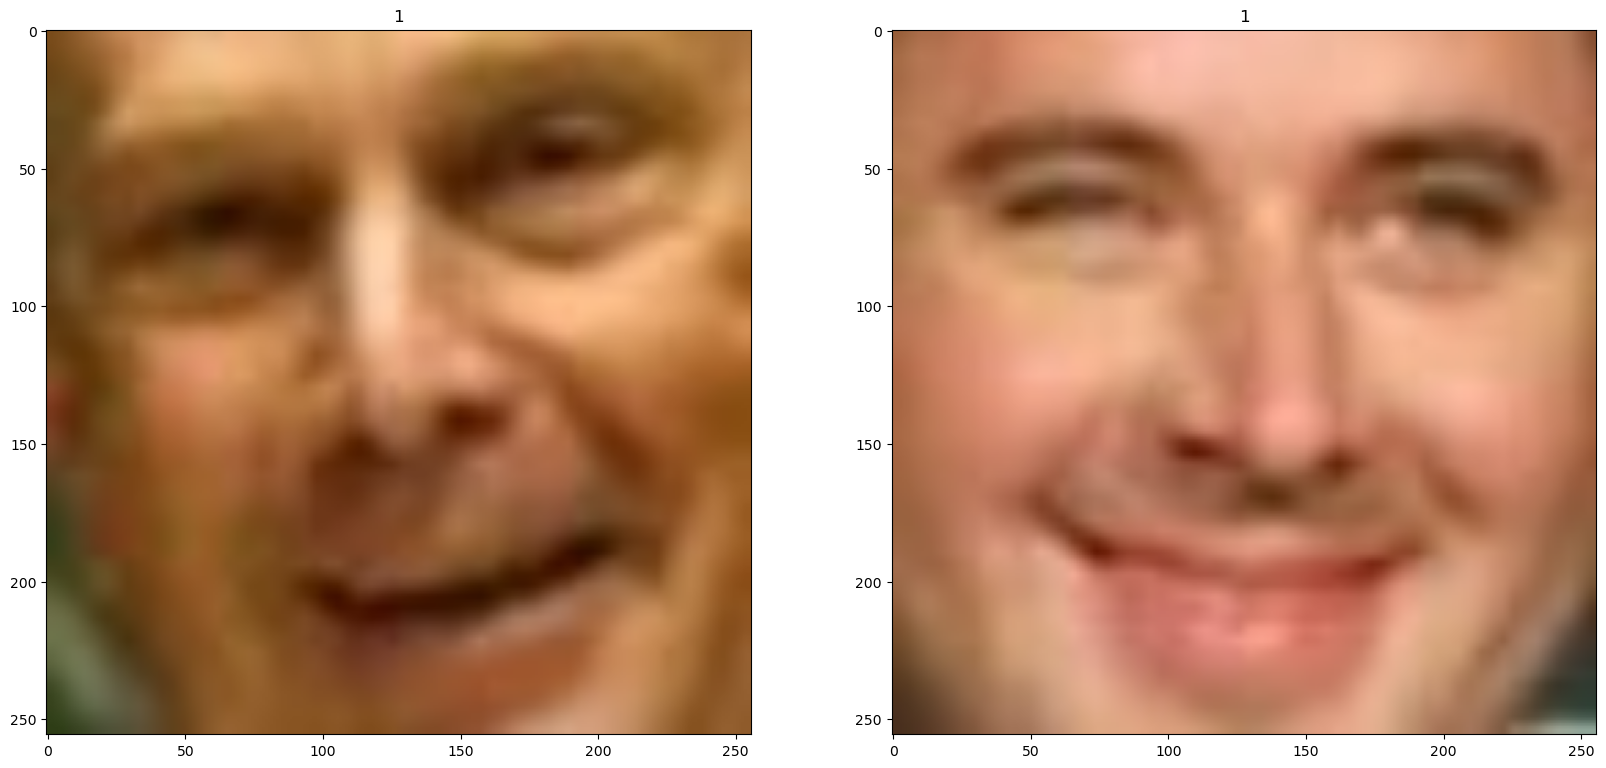

In [291]:
fig, ax = plt.subplots(ncols=2, figsize=(20,20))
for idx, img in enumerate(batch[0][:2]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [292]:
batch[0].max()

255.0

In [293]:
data = data.map(lambda x,y: (x/255, y))

In [294]:
data.as_numpy_iterator().next()[0].max()

1.0

In [295]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)-2
test_size = int(len(data)*.1)-1

val_size+train_size+test_size

32

In [296]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [297]:
model = Sequential()

In [298]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [299]:
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

In [300]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [301]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [303]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 689ms/step - accuracy: 0.5354 - loss: 0.8633 - val_accuracy: 0.5063 - val_loss: 0.7014
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 319ms/step - accuracy: 0.6406 - loss: 0.6379 - val_accuracy: 0.7125 - val_loss: 0.5038
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - accuracy: 0.7964 - loss: 0.4420 - val_accuracy: 0.8438 - val_loss: 0.3252
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.8430 - loss: 0.3454 - val_accuracy: 0.8813 - val_loss: 0.2715
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.8905 - loss: 0.2512 - val_accuracy: 0.9187 - val_loss: 0.2926
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.9156 - loss: 0.2035 - val_accuracy: 0.9000 - val_loss: 0.2592
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - accuracy: 0.9431 - loss: 0.1431 - val_accuracy: 0.9563 - val_loss: 0.1508
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.9669 - loss: 0.1074 - val_accuracy: 0

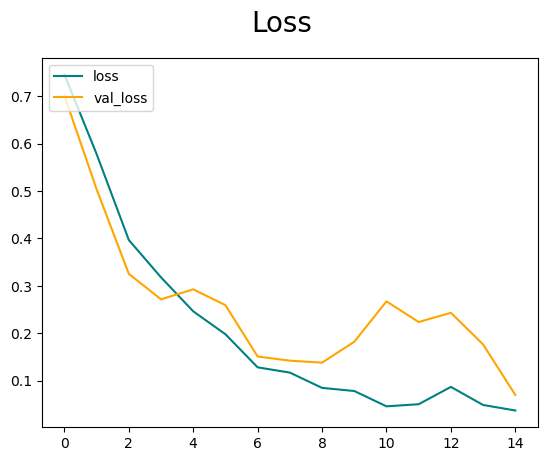

In [315]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

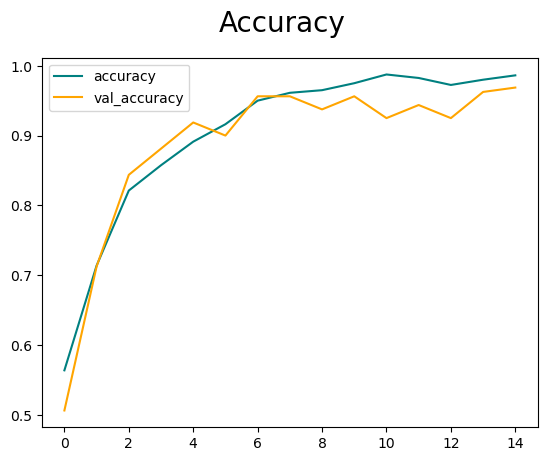

In [314]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [306]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [307]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [308]:
print(f'Precision: {pre.result()}, Recall:{re.result()}, Accuracy{acc.result()}')

Precision: 1.0, Recall:0.9655172228813171, Accuracy0.984375


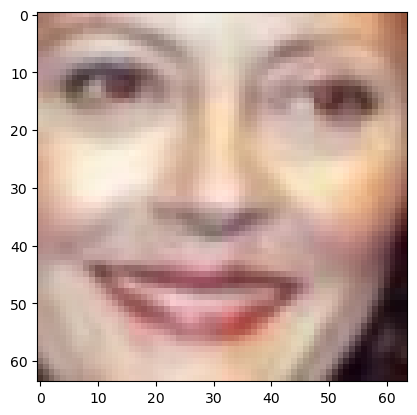

In [309]:
img = cv2.imread('./test/Susan_Sarandon_0005.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

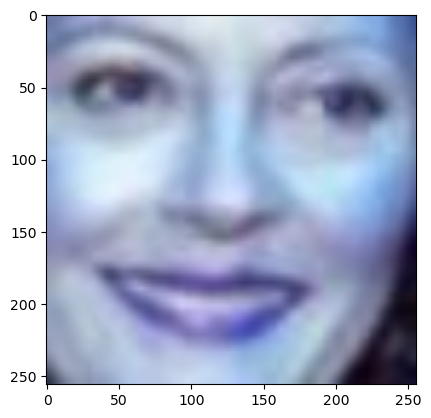

In [310]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [311]:
out = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


In [312]:
if out > 0.5: 
    print('Happy')
else:
    print('Sad')

Happy
